In [1]:
import folium

#!pip install folium




In [2]:
lat = 43.7031000
lon = -72.28854


In [3]:
map = folium.Map(location=[lat, lon], zoom_start=15)
map

In [4]:
map = folium.Map()
marker = folium.Marker(location=[lat, lon], popup='An interesting point')
marker.add_to(map)
map

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely


In [7]:
point_csv = pd.read_csv('https://rcweb.dartmouth.edu/homes/f002d69/workshops/data/bear-sightings.csv')
point_csv

,bear.id,longitude,latitude
0,7,-148.956023,62.658220
1,57,-152.622839,58.350642
2,69,-144.937397,62.382270
3,75,-152.848486,59.901222
4,104,-143.294816,61.073108
...,...,...,...
489,9962,-134.234641,56.323433
490,9979,-155.159563,58.875048
491,9981,-152.059917,61.656170
492,9987,-146.847410,61.882674


In [9]:
point_csv.head(3)

,bear.id,longitude,latitude
0,7,-148.956023,62.658220
1,57,-152.622839,58.350642
2,69,-144.937397,62.382270


In [10]:
point_csv.tail(3)

,bear.id,longitude,latitude
491,9981,-152.059917,61.656170
492,9987,-146.847410,61.882674
493,9996,-160.670380,67.570788


In [13]:
from google.colab import files
uploaded = files.upload()

Saving nationalparks_ak (12).zip to nationalparks_ak (12).zip


In [14]:
file_name = list(uploaded.keys())[0]
polygons = gpd.read_file(file_name)
polygons.head(3)

,Unit_Code,Unit_Name,Unit_Type,NPS_Region,ScaleRank,FeatureCla,Note,Name,geometry
0,YUCH,Yukon-Charley Rivers N PRES,National Preserve,Alaska,4,National Park Service,None,Yukon-Charley Rivers N PRES,"POLYGON ((-142.34907 64.99516, -142.34907 64.9..."
1,NOAT,Noatak N PRES,National Preserve,Alaska,4,National Park Service,None,Noatak N PRES,"POLYGON ((-155.65266 68.02284, -155.65266 68.0..."
2,KOVA,Kobuk Valley NP,National Park,Alaska,4,National Park Service,None,Kobuk Valley,"POLYGON ((-157.85947 67.42408, -157.85947 67.4..."


In [15]:
points = gpd.GeoDataFrame(point_csv, geometry=gpd.points_from_xy(point_csv.longitude, point_csv.latitude))
points.head(3)

,bear.id,longitude,latitude,geometry
0,7,-148.956023,62.658220,POINT (-148.95602 62.65822)
1,57,-152.622839,58.350642,POINT (-152.62284 58.35064)
2,69,-144.937397,62.382270,POINT (-144.9374 62.38227)


In [16]:
points.crs='EPSG:4326'

In [17]:
points = points.to_crs(polygons.crs)

In [20]:
points_in_polygons = gpd.sjoin(points, polygons, predicate='within')
points_in_polygons.head(50)

,bear.id,longitude,latitude,geometry,index_right,Unit_Code,Unit_Name,Unit_Type,NPS_Region,ScaleRank,FeatureCla,Note,Name
2,69,-144.937397,62.382270,POINT (-144.9374 62.38227),9,WRST,Wrangell-St. Elias NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Wrangell-St. Elias
3,75,-152.848486,59.901222,POINT (-152.84849 59.90122),5,LACL,Lake Clark NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Lake Clark
4,104,-143.294816,61.073108,POINT (-143.29482 61.07311),9,WRST,Wrangell-St. Elias NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Wrangell-St. Elias
6,115,-151.836063,67.989655,POINT (-151.83606 67.98965),11,GAAR,Gates of the Arctic NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Gates of the Arctic
9,135,-155.748290,58.864576,POINT (-155.74829 58.86458),4,KATM,Katmai NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Katmai
30,446,-153.533474,60.036864,POINT (-153.53347 60.03686),5,LACL,Lake Clark NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Lake Clark
33,557,-151.640764,67.832113,POINT (-151.64076 67.83211),11,GAAR,Gates of the Arctic NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Gates of the Arctic
34,581,-137.628032,59.086342,POINT (-137.62803 59.08634),10,GLBA,Glacier Bay NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Glacier Bay
42,839,-141.061202,61.642773,POINT (-141.0612 61.64277),9,WRST,Wrangell-St. Elias NP & PRES,National Park and Preserve,Alaska,4,National Park Service,None,Wrangell-St. Elias
46,920,-158.112870,56.938114,POINT (-158.11287 56.93811),3,ANIA,Aniakchak NM & PRES,National Monument and Preserve,Alaska,4,National Park Service,None,Aniakchak NM & PRES


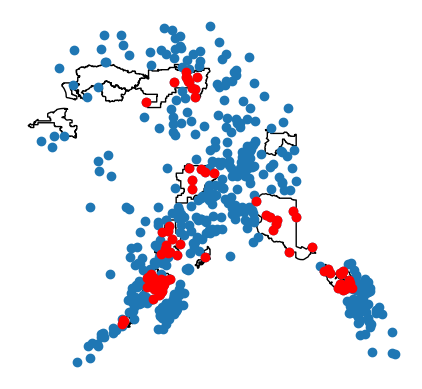

In [24]:
polygons.plot(facecolor='none')
points.plot(ax=plt.gca())
points_in_polygons.plot(color='red', ax=plt.gca())
plt.axis("off")
plt.show()